In [54]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import losses

In [55]:
print(tf.__version__)

2.12.0


In [35]:
import matplotlib.pyplot as plt

In [56]:
tf.random.set_seed(42)

In [93]:
X = np.linspace(0, 80, 1000)
y = np.linspace(0, 50, 1000)
 

X += np.random.uniform(-4, 9, 1000)
y += np.random.uniform(-4, 7, 1000)
 


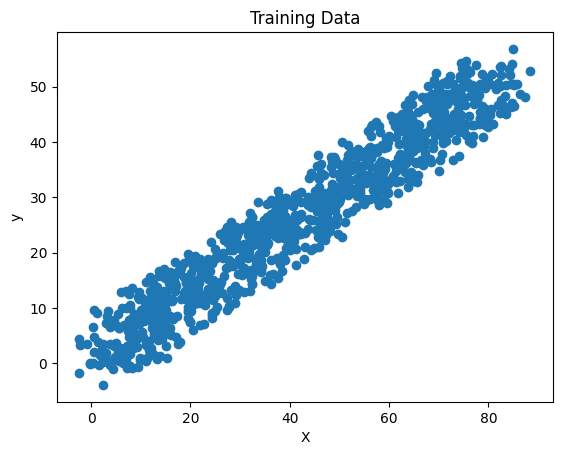

In [94]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [95]:


# Reshape the X vector to a matrix
X = np.expand_dims(X,axis=-1)
# Creating the label for the dataset
y = np.expand_dims(y,axis=-1)



In [108]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(1,1)), # Defing the input shape
tf.keras.layers.Dense(1, name='outputLayer') # Defing the output shape
], name='linearRegressor')
# 2. Compile the model
model.compile(loss=tf.keras.losses.MeanSquaredError(),
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.3),
metrics=['mae'])
# 3. Visualize the model
model.summary()
# Convert the data to tensors
X = tf.constant(X)
y = tf.constant(y)

# 4. Fit the model
history = model.fit(X,y, epochs=20, validation_split=0.33, batch_size=10, verbose=0, shuffle=True)
# 5. Viewing the value of bias and weights calculated by the model
print(f"Weights: {model.layers[0].weights}\n Bias: {model.layers[0].bias.numpy()}")

Model: "linearRegressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 outputLayer (Dense)         (None, 1, 1)              2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Weights: [<tf.Variable 'outputLayer/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[nan]], dtype=float32)>, <tf.Variable 'outputLayer/bias:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>]
 Bias: [nan]


In [105]:
# Checking the outcome for a single 1X1 input tensor(matrix).
#model.predict(tf.constant([[10]]))
# Predicting the results y_pred on the original input matrix X
y_preds = model.predict(X)
# Changing the y and y_preds to vectors 
y = y.squeeze()
y_preds = y_preds.squeeze()
# Calculating the MAE and MSE
mae = tf.metrics.mean_absolute_error(y, y_preds)
mse = tf.metrics.mean_squared_error(y, y_preds)
print(f"MAE: {mae}\nMSE: {mse}")

32/32 [==============================] - 0s 1ms/step
MAE: nan
MSE: nan
